In [4]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/processed/ibovfull.csv', index_col='Date', parse_dates=True)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,17.730000,17.730000,17.209999,17.209999,14.775685,13206900.0,ABEV3
2016-01-05,17.250000,17.520000,17.110001,17.480000,15.007494,10774200.0,ABEV3
2016-01-06,17.360001,17.480000,17.200001,17.309999,14.861542,7739100.0,ABEV3
2016-01-07,17.170000,17.320000,16.850000,16.850000,14.466608,15316400.0,ABEV3
2016-01-08,16.930000,17.200001,16.930000,17.070000,14.655489,10684000.0,ABEV3


In [7]:
itub = df[df['Name'] == 'ITUB4'][['Close']]

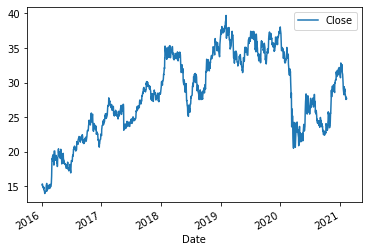

In [8]:
itub.plot();

In [52]:
Ntest = 30
train = itub.iloc[:-Ntest]
test = itub.iloc[-Ntest:]

In [55]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10, stepwise=False, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2111.569, Time=1.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2111.294, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2113.179, Time=1.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2112.981, Time=1.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2114.426, Time=2.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2115.105, Time=4.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2111.333, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2112.171, Time=4.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2114.171, Time=5.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2114.691, Time=1.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2104.759, Time=1.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2113.257, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2114.171, Time=1.38 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2116.082, Time=2.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2116.647, Time=2.82 sec
 ARIMA(3,1

In [42]:
# model = pm.auto_arima(train, trace=True, suppress_warnings=True, max_p=12, max_q=2, max_order=14, stepwise=False, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1580.399, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1580.271, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1581.717, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1580.368, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1581.902, Time=1.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1583.708, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1581.703, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1584.356, Time=0.69 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1579.143, Time=2.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1583.430, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1584.847, Time=1.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1580.970, Time=2.58 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1582.081, Time=0.41 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1582.491, Time=1.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1584.462, Time=1.87 sec
 ARIMA(5,1

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1043.508
Date:                Sun, 21 Feb 2021   AIC                           2101.017
Time:                        12:18:42   BIC                           2136.871
Sample:                             0   HQIC                          2114.502
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0276      0.029      0.949      0.343      -0.029       0.084
ar.L1         -0.8330      0.076    -10.890      0.000      -0.983      -0.683
ar.L2         -0.0439      0.028     -1.542      0.123      -0.100       0.012
ar.L3         -0.0473      0.027     -1.770      0.077      -0.100       0.005
ar.L4         -0.0992      0.023     -4.304      0.000      -0.144      -0.054
ma.L1          0.7980      0.077     10.358      0.000       0.647       0.949
sigma2         0.3155      0.009     35.541      0.000       0.298       0.333
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               297.71
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [53]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
    ax.legend();

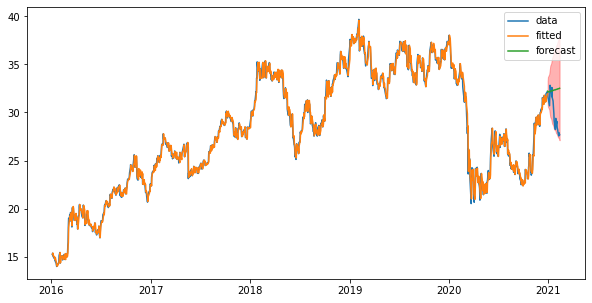

In [57]:
plot_result(model, itub, train, test)

In [47]:
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
    ax.legend();

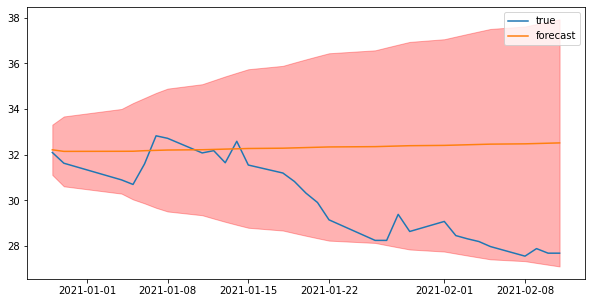

In [58]:
plot_test(model, test)

In [17]:
def rmse(y, t):
    return np.sqrt(np.mean((t - y)**2))

In [59]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [60]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    2.944328
dtype: float64
RSME Naive: Close    2.759496
dtype: float64


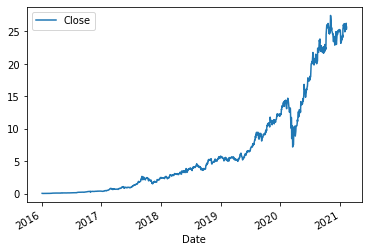

In [20]:
aapl = df[df['Name'] == 'MGLU3'][['Close']]
aapl.plot();

In [21]:
train = aapl.iloc[:-Ntest]
test = aapl.iloc[-Ntest:]

In [22]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1392.505, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=967.096, Time=0.39 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1390.505, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=841.816, Time=0.38 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=768.722, Time=0.51 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=685.392, Time=0.73 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=667.515, Time=0.65 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.34 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=444.576, Time=4.91 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.68 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=452.712, Time=3.61 sec
 ARI

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(4, 2, 1)   Log Likelihood                -215.288
Date:                Sun, 21 Feb 2021   AIC                            444.576
Time:                        12:04:09   BIC                            480.425
Sample:                             0   HQIC                           458.059
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.677e-05   8.89e-05      0.639      0.523      -0.000       0.000
ar.L1         -0.0680      0.011     -6.008      0.000      -0.090      -0.046
ar.L2         -0.0111      0.012     -0.898      0.369      -0.035       0.013
ar.L3         -0.0949      0.014     -6.692      0.000      -0.123      -0.067
ar.L4         -0.0396      0.013     -3.014      0.003      -0.065      -0.014
ma.L1         -0.9894      0.003   -306.677      0.000      -0.996      -0.983
sigma2         0.0828      0.001     70.178      0.000       0.080       0.085
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):             12650.01
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):             341.15   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

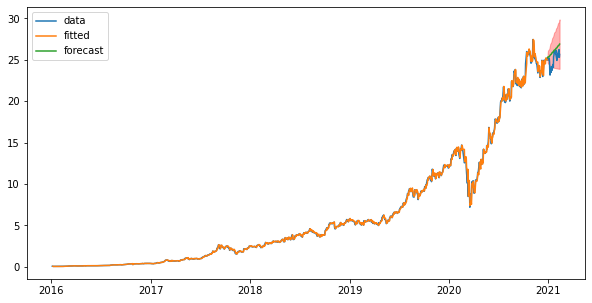

In [24]:
plot_result(model, aapl, train, test)

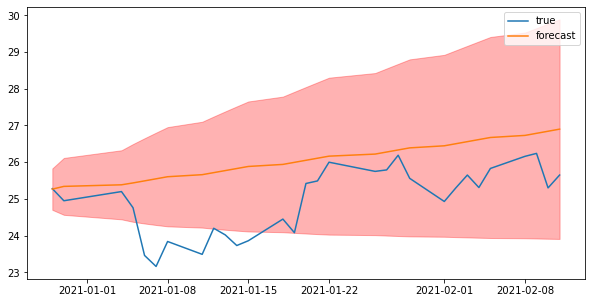

In [25]:
plot_test(model, test)

In [26]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [27]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    1.311434
dtype: float64
RSME Naive: Close    0.941702
dtype: float64


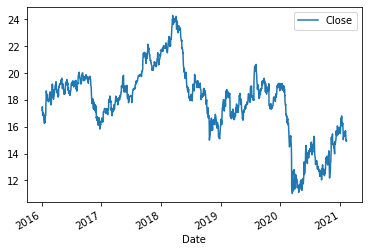

In [28]:
ibm = df[df['Name'] == 'ABEV3'][['Close']]
ibm.plot();

In [29]:
train = ibm.iloc[:-Ntest]
test = ibm.iloc[-Ntest:]

In [30]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=438.860, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=444.560, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=441.610, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=442.110, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=442.580, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=441.526, Time=0.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=441.944, Time=1.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=439.772, Time=3.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=437.994, Time=2.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=442.060, Time=1.77 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=442.527, Time=4.07 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=443.465, Time=1.69 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=442.527, Time=1.73 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=444.137, Time=3.79 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=435.8

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -211.913
Date:                Sun, 21 Feb 2021   AIC                            435.827
Time:                        12:04:51   BIC                            466.559
Sample:                             0   HQIC                           447.385
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6924      0.026    -65.780      0.000      -1.743      -1.642
ar.L2         -0.9656      0.025    -39.069      0.000      -1.014      -0.917
ma.L1          1.6401      0.032     50.470      0.000       1.576       1.704
ma.L2          0.8983      0.040     22.499      0.000       0.820       0.977
ma.L3         -0.0230      0.022     -1.050      0.294      -0.066       0.020
sigma2         0.0824      0.002     45.733      0.000       0.079       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1814.61
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

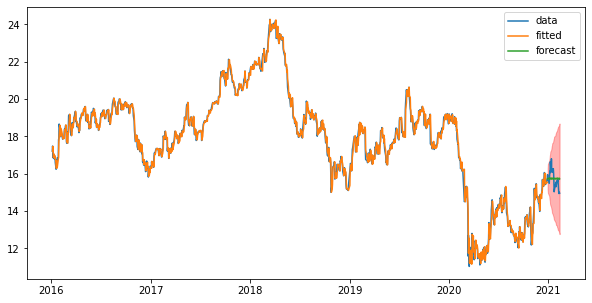

In [32]:
plot_result(model, ibm, train, test)

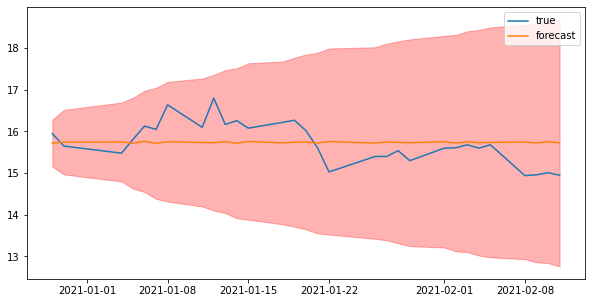

In [33]:
plot_test(model, test)

In [34]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [35]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    0.485277
dtype: float64
RSME Naive: Close    0.486272
dtype: float64


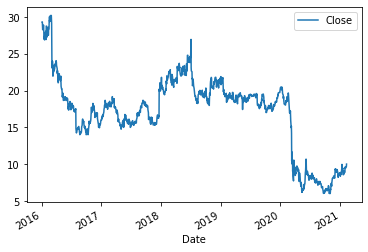

In [36]:
sbux = df[df['Name'] == 'EMBR3'][['Close']]
sbux.plot();

In [37]:
train = sbux.iloc[:-Ntest]
test = sbux.iloc[-Ntest:]

In [38]:
model = pm.auto_arima(train, erro_action='ignore', trace=True, suppress_warnings=True, maxinter=10,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1579.143, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1580.399, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1580.368, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1580.271, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1580.045, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1583.708, Time=1.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1584.356, Time=0.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1580.970, Time=2.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1580.972, Time=2.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1581.902, Time=1.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1583.915, Time=1.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1584.847, Time=1.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1582.218, Time=3.54 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1578.917, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1240
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -784.458
Date:                Sun, 21 Feb 2021   AIC                           1578.917
Time:                        12:05:21   BIC                           1604.527
Sample:                             0   HQIC                          1588.549
                               - 1240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8750      0.053     16.574      0.000       0.771       0.978
ar.L2         -0.9085      0.048    -18.932      0.000      -1.003      -0.814
ma.L1         -0.9088      0.053    -17.256      0.000      -1.012      -0.806
ma.L2          0.9124      0.048     19.133      0.000       0.819       1.006
sigma2         0.2077      0.003     70.033      0.000       0.202       0.214
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             16430.91
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -1.27
Prob(H) (two-sided):                  0.02   Kurtosis:                        20.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

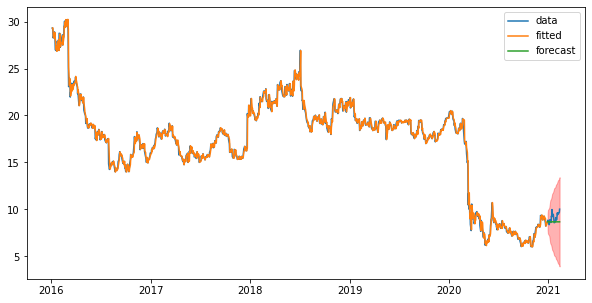

In [41]:
plot_result(model, sbux, train, test)

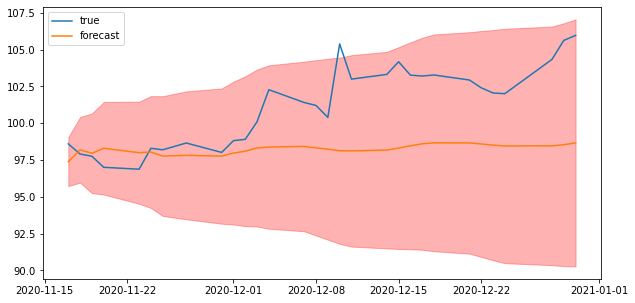

In [109]:
plot_test(model, test)

In [110]:
predictions = model.predict(Ntest)
predictions2 = predictions.reshape(30,1)

In [111]:
print("RSME ARIMA:", rmse(predictions2, test))
print("RSME Naive:", rmse(train.iloc[-1], test))

RSME ARIMA: Close    3.854784
dtype: float64
RSME Naive: Close    4.343226
dtype: float64
